In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("final_stock_dataset.csv", parse_dates=["Month"])
df.head()

,Month,Mean_Return,Min_Return,Max_Return,Volatility,Ticker,Month_Num,Year,Volatility_Level,Prev_Month_Return,momentum_rsi,trend_macd,volatility_bbm,trend_ema_fast
0,2024-05-01,0.006251,-0.021058,0.059816,0.015663,AAPL,5,2024,Low,NaN,66.111809,3.456740,176.590836,180.426010
1,2024-06-01,0.005025,-0.021513,0.072649,0.021371,AAPL,6,2024,Medium,0.006251,69.745261,6.080051,195.338797,199.529268
2,2024-07-01,0.002526,-0.028754,0.029105,0.015506,AAPL,7,2024,Low,0.005025,63.164971,6.331051,217.746805,220.495766
3,2024-08-01,0.001549,-0.048167,0.017193,0.014390,AAPL,8,2024,Low,0.002526,54.551116,0.994891,219.574004,219.591097
4,2024-09-01,0.000970,-0.027775,0.037066,0.014810,AAPL,9,2024,Low,0.001549,51.527563,0.761451,223.082275,222.843240


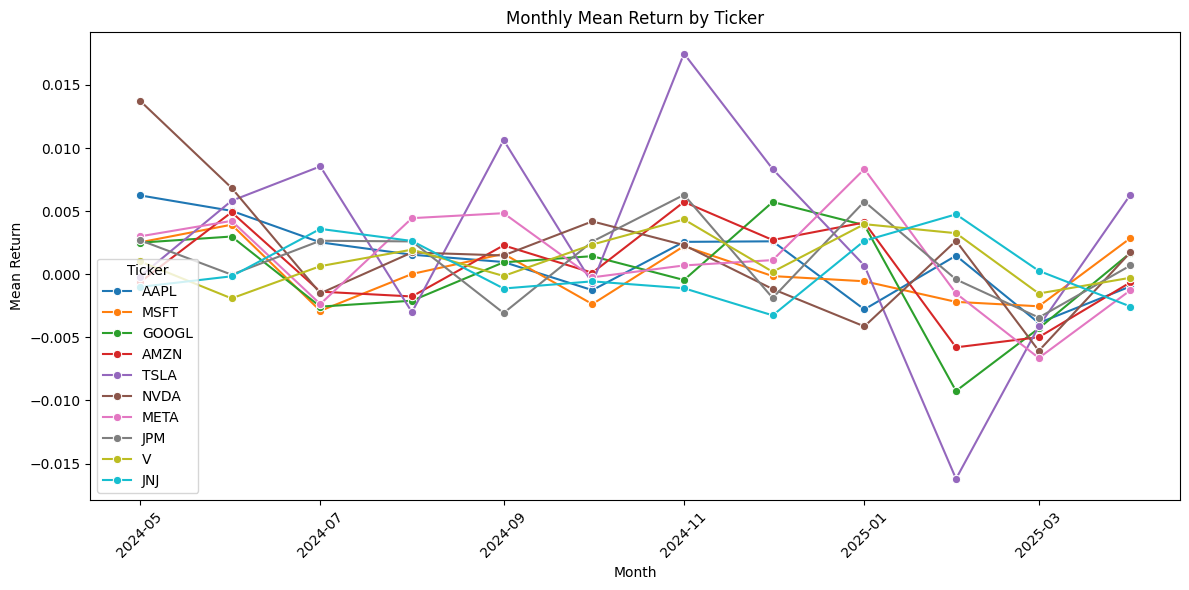

In [3]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Month', y='Mean_Return', hue='Ticker', marker='o')
plt.title("Monthly Mean Return by Ticker")
plt.ylabel("Mean Return")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

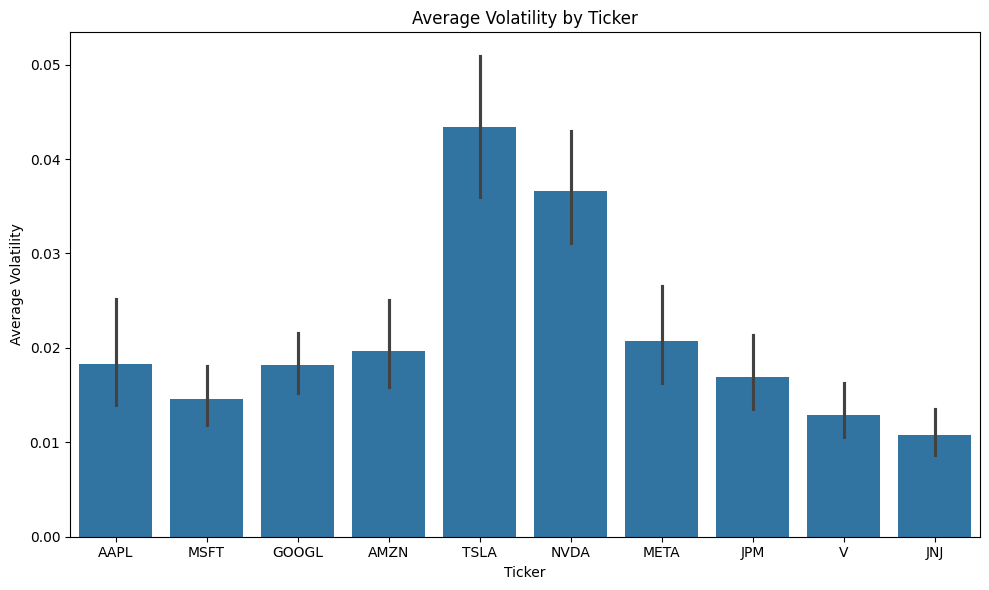

In [4]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Ticker', y='Volatility', estimator='mean')
plt.title("Average Volatility by Ticker")
plt.ylabel("Average Volatility")
plt.xlabel("Ticker")
plt.tight_layout()
plt.show()

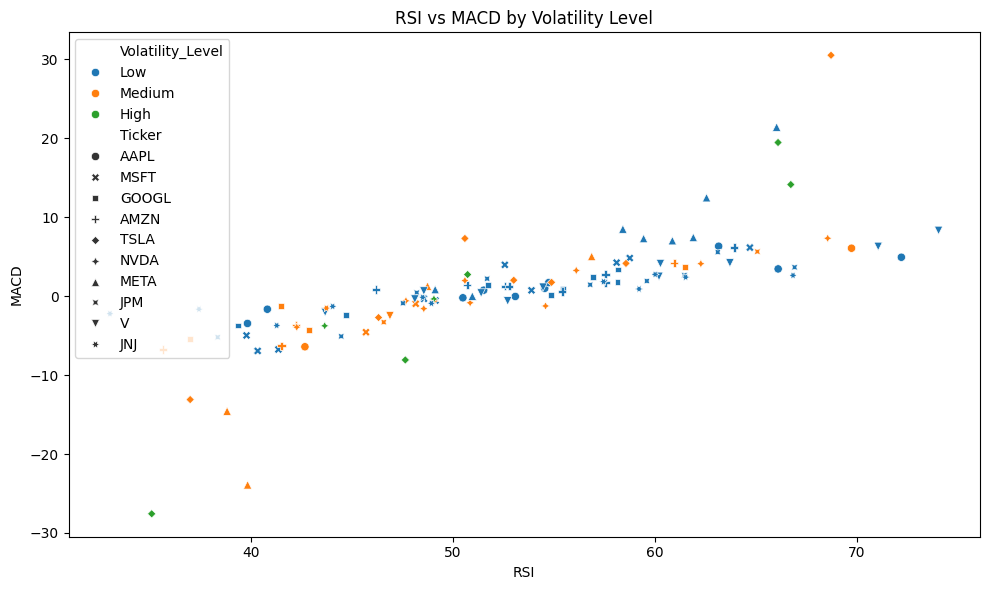

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='momentum_rsi', y='trend_macd', hue='Volatility_Level', style='Ticker')
plt.title("RSI vs MACD by Volatility Level")
plt.xlabel("RSI")
plt.ylabel("MACD")
plt.tight_layout()
plt.show()

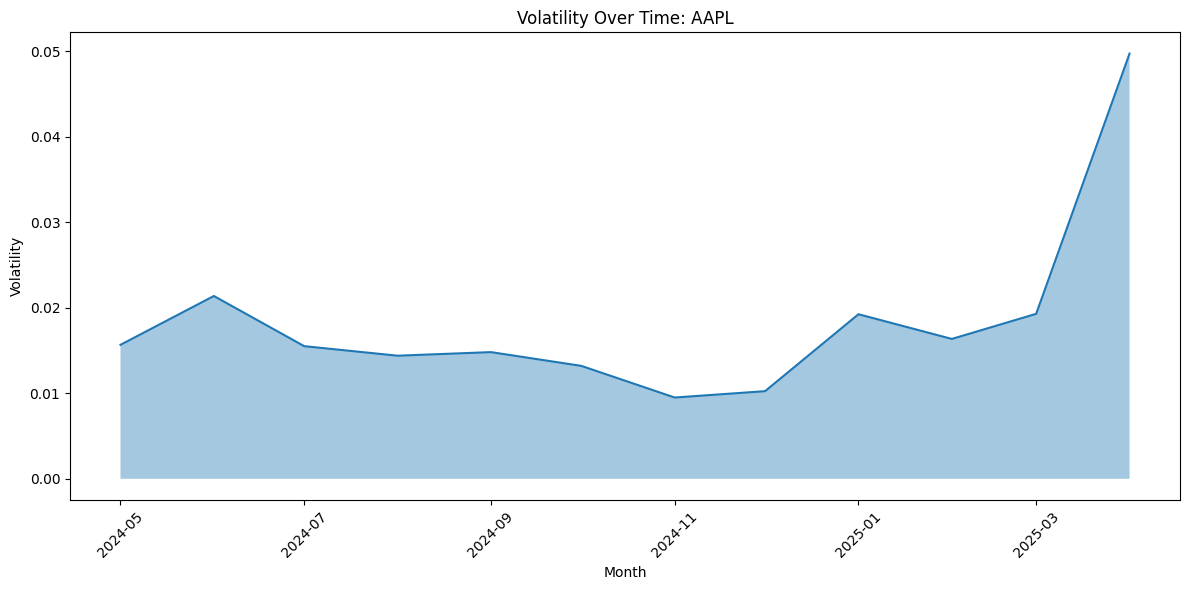

In [6]:
ticker = 'AAPL'  # change as needed
filtered = df[df['Ticker'] == ticker]

plt.figure(figsize=(12, 6))
plt.fill_between(filtered['Month'], filtered['Volatility'], alpha=0.4)
plt.plot(filtered['Month'], filtered['Volatility'], label='Volatility')
plt.title(f"Volatility Over Time: {ticker}")
plt.ylabel("Volatility")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

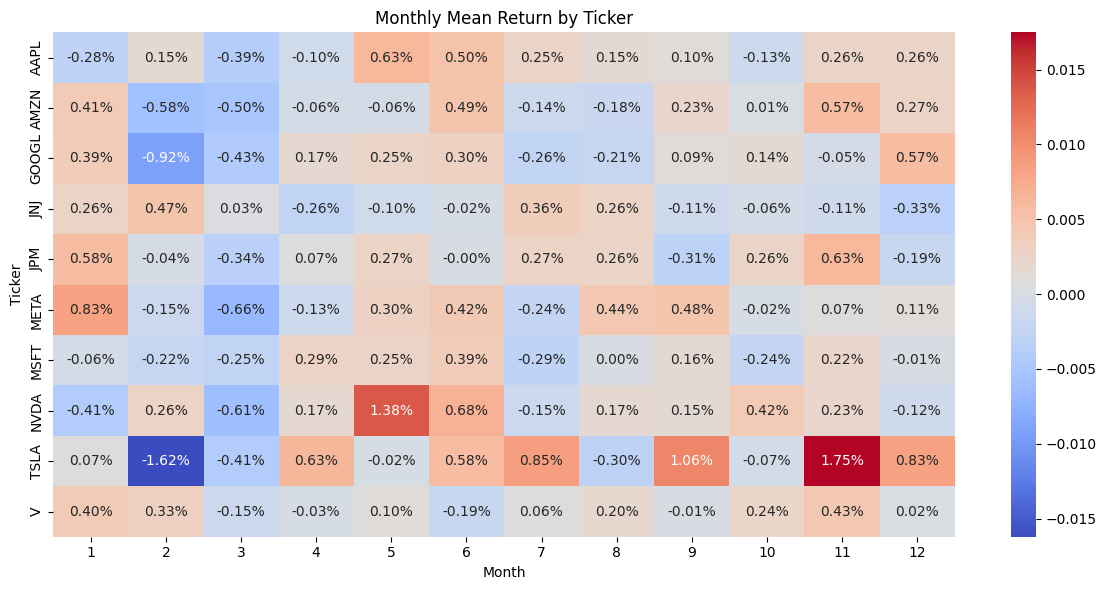

In [7]:
pivot = df.pivot_table(values='Mean_Return', index='Ticker', columns='Month_Num', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt=".2%")
plt.title("Monthly Mean Return by Ticker")
plt.ylabel("Ticker")
plt.xlabel("Month")
plt.tight_layout()
plt.show()


In [8]:
import plotly.express as px
fig = px.line(df, x="Month", y="Mean_Return", color="Ticker", title="Mean Return Over Time")
fig.show()

In [10]:
import altair as alt
chart = alt.Chart(df).mark_line(point=True).encode(
    x='Month:T',
    y='Mean_Return:Q',
    color='Ticker:N'
).properties(title="Mean Return by Ticker")
chart.show()


alt.Chart(...)

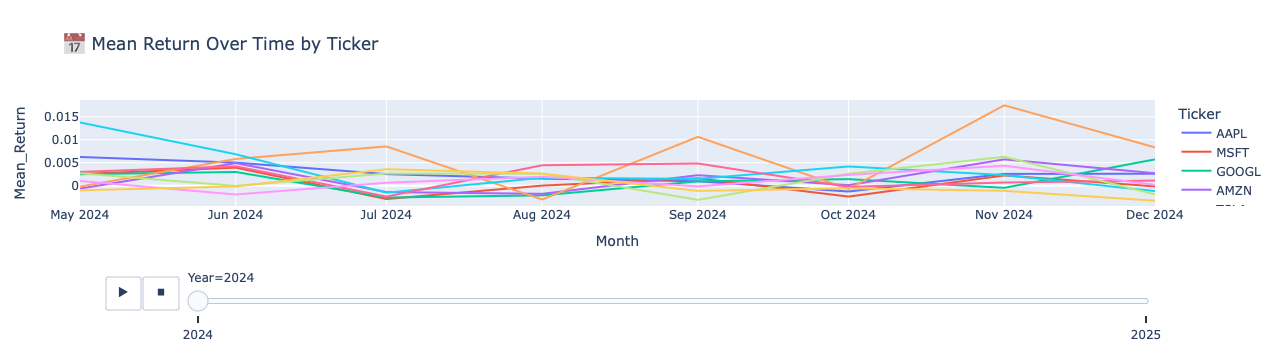

In [21]:
import plotly.express as px

fig = px.line(df, 
              x='Month', 
              y='Mean_Return', 
              color='Ticker', 
              line_group='Ticker', 
              animation_frame='Year',
              title='📅 Mean Return Over Time by Ticker')
fig.show()


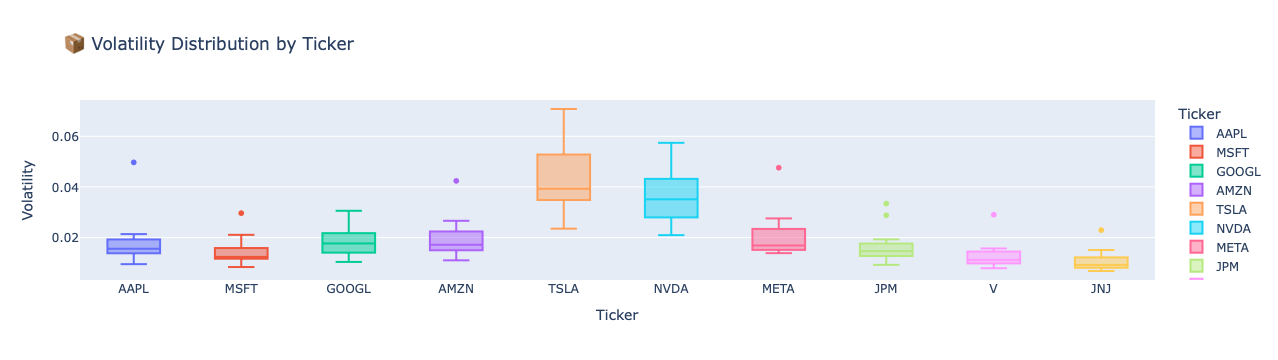

In [22]:
fig = px.box(df, 
             x='Ticker', 
             y='Volatility', 
             color='Ticker',
             title='📦 Volatility Distribution by Ticker')
fig.show()

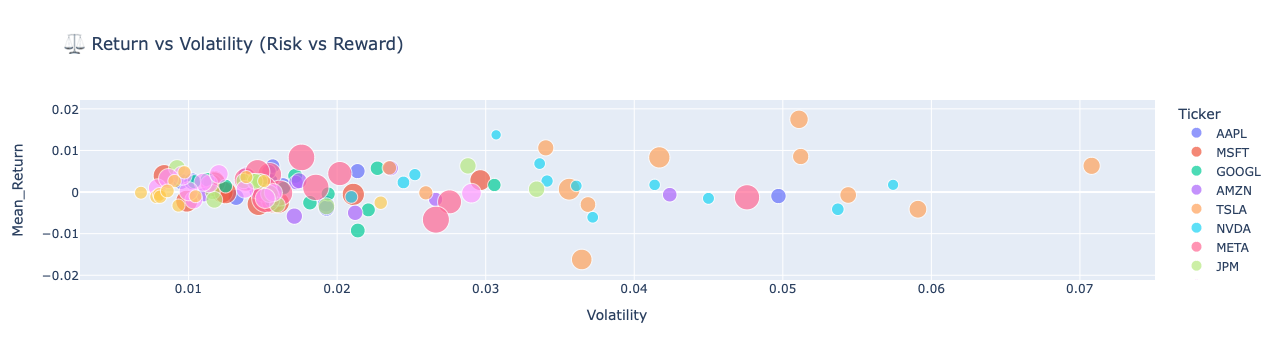

In [23]:
fig = px.scatter(df,
                 x='Volatility',
                 y='Mean_Return',
                 color='Ticker',
                 size='trend_ema_fast',
                 hover_data=['Month'],
                 title='⚖️ Return vs Volatility (Risk vs Reward)')
fig.show()

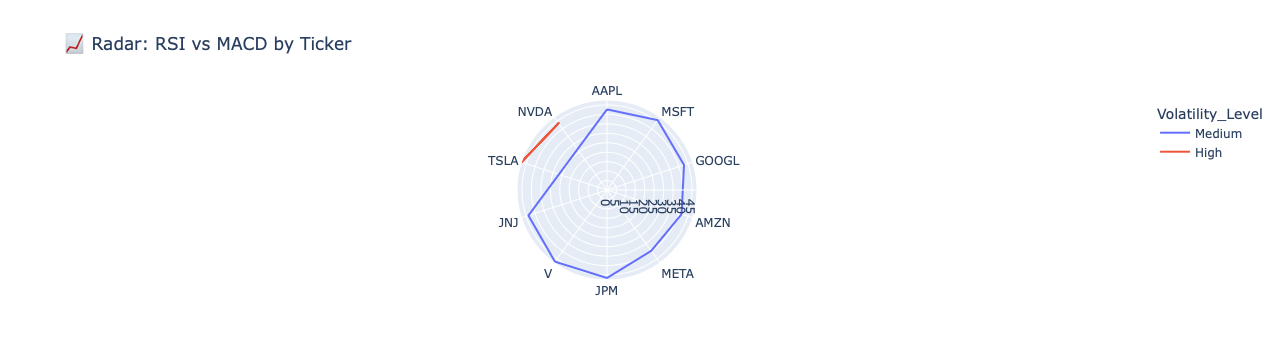

In [24]:
df = pd.read_csv('final_stock_dataset.csv')
latest = df[df['Month'] == df['Month'].max()]

fig = px.line_polar(latest,
                    r='momentum_rsi',
                    theta='Ticker',
                    line_close='trend_macd',
                    color='Volatility_Level',
                    title='📈 Radar: RSI vs MACD by Ticker')
fig.show()

/var/folders/j1/p1xq9vpd7jv27gxx2nvhyh380000gn/T/ipykernel_98568/2529188639.py:8: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

/opt/homebrew/Cellar/jupyterlab/4.3.6/libexec/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



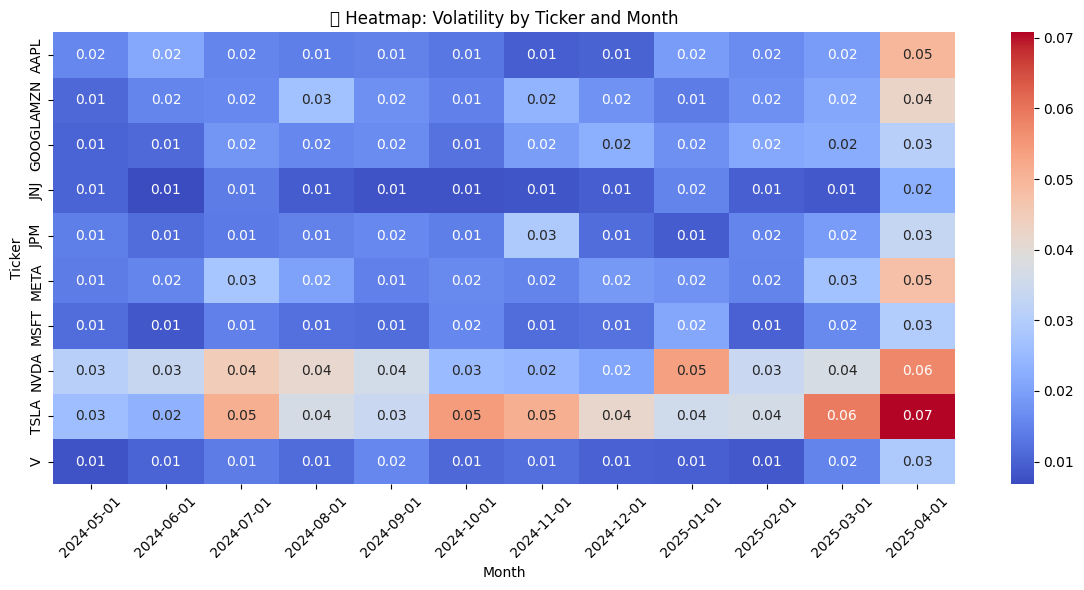

In [25]:
df = pd.read_csv('final_stock_dataset.csv')

plt.figure(figsize=(12, 6))
heat_data = df.pivot_table(index='Ticker', columns='Month', values='Volatility')
sns.heatmap(heat_data, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("📊 Heatmap: Volatility by Ticker and Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

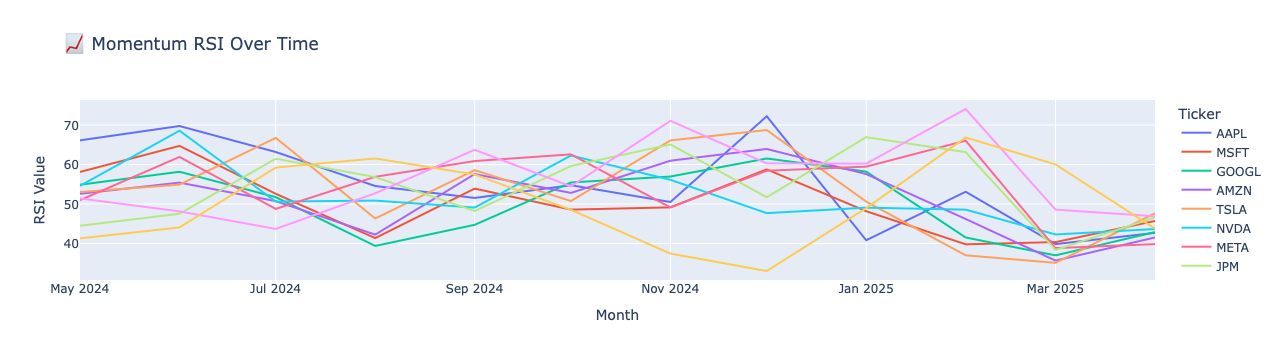

In [26]:
fig = px.line(df,
              x='Month',
              y='momentum_rsi',
              color='Ticker',
              title='📈 Momentum RSI Over Time')
fig.update_layout(yaxis_title='RSI Value')
fig.show()



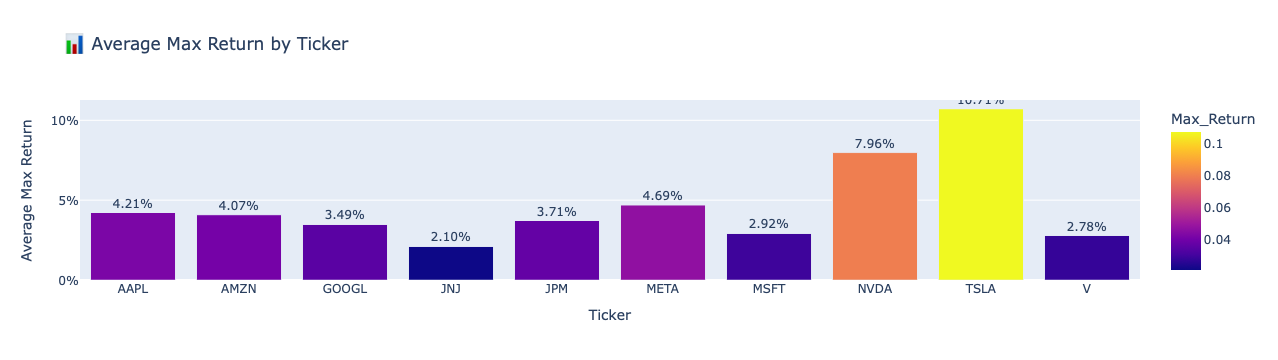

In [27]:
avg_max = df.groupby('Ticker')['Max_Return'].mean().reset_index()

fig = px.bar(avg_max,
             x='Ticker',
             y='Max_Return',
             color='Max_Return',
             title='📊 Average Max Return by Ticker',
             text='Max_Return')
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
fig.update_layout(yaxis_tickformat='.0%', yaxis_title='Average Max Return')
fig.show()

/var/folders/j1/p1xq9vpd7jv27gxx2nvhyh380000gn/T/ipykernel_98568/1082465217.py:16: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.

/opt/homebrew/Cellar/jupyterlab/4.3.6/libexec/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.



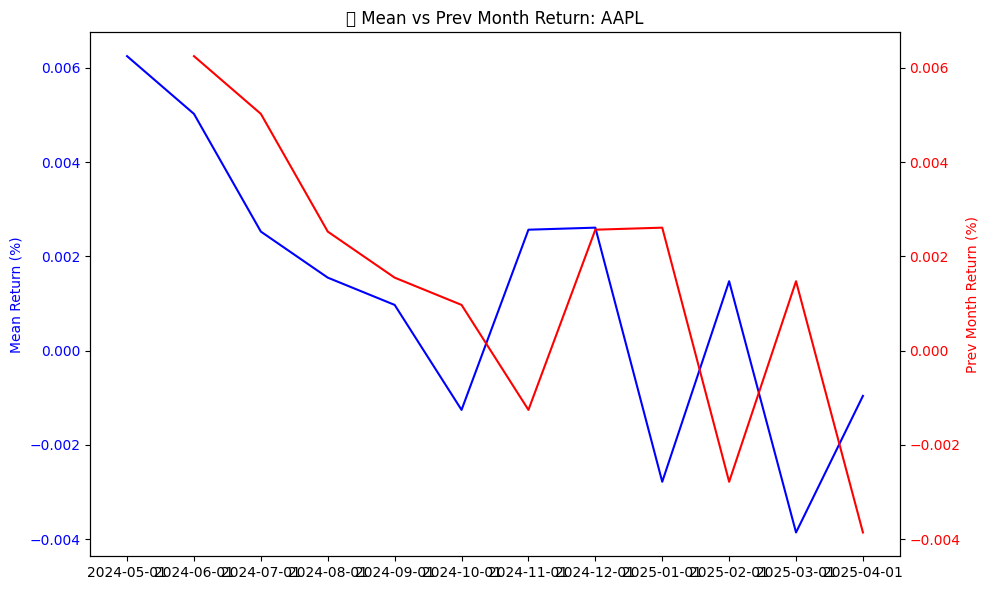

In [28]:
ticker = 'AAPL'  # change to any ticker
df_filtered = df[df['Ticker'] == ticker]

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df_filtered['Month'], df_filtered['Mean_Return'], color='blue', label='Mean Return')
ax1.set_ylabel('Mean Return (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(df_filtered['Month'], df_filtered['Prev_Month_Return'], color='red', label='Previous Month Return')
ax2.set_ylabel('Prev Month Return (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title(f"📉 Mean vs Prev Month Return: {ticker}")
fig.tight_layout()
plt.show()

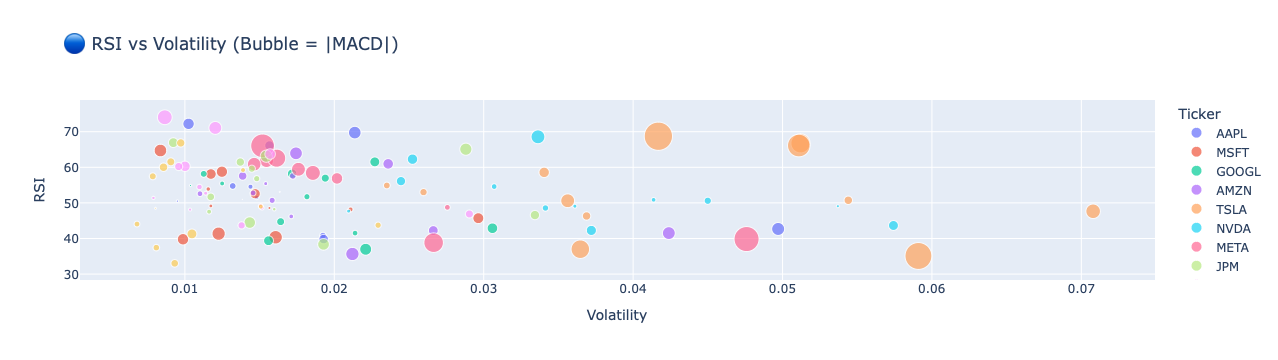

In [30]:
df = pd.read_csv('final_stock_dataset.csv')

fig = px.scatter(df,
                 x='Volatility',
                 y='momentum_rsi',
                 size=df['trend_macd'].abs(),  # fixed here
                 color='Ticker',
                 hover_data=['Month'],
                 title='🔵 RSI vs Volatility (Bubble = |MACD|)')
fig.update_layout(xaxis_title='Volatility', yaxis_title='RSI')
fig.show()